In [33]:
# librerie
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [34]:
# configurazione
encoding_dim = 323 # dimensioni encoder
noise_std = 0.2
n_components = 323 # componenti principali per soglia 95%

In [35]:
# percorsi utili
base_dir = os.getcwd()  # percorso base
# percorso per salvare output
outputs = os.path.join(base_dir, "outputs")
output_ae = os.path.join(base_dir, "ae_outputs")
output_pca = os.path.join(base_dir, "pca_outputs")
save_pca = os.path.join(output_pca, f'pca_data_{n_components}_{noise_std}_summary.csv')
save_ae_cnn = os.path.join(output_ae, f'ae_data_{encoding_dim}_{noise_std}_summary.csv')

In [36]:
# caricamento risultati
ae_df = pd.read_csv(save_ae_cnn)
ae_df['method'] = 'Autoencoder'

pca_df = pd.read_csv(save_pca)
pca_df['method'] = 'PCA'

best_ae = ae_df[ae_df['config_id'] == 6].iloc[0] # migliori configurazioni
best_pca = pca_df[pca_df['config_id'] == 14].iloc[0]

In [37]:
# unione dei dataframe
df = pd.concat([ae_df, pca_df], ignore_index=True)
df['test_accuracy'] = df['test_accuracy'] / 100

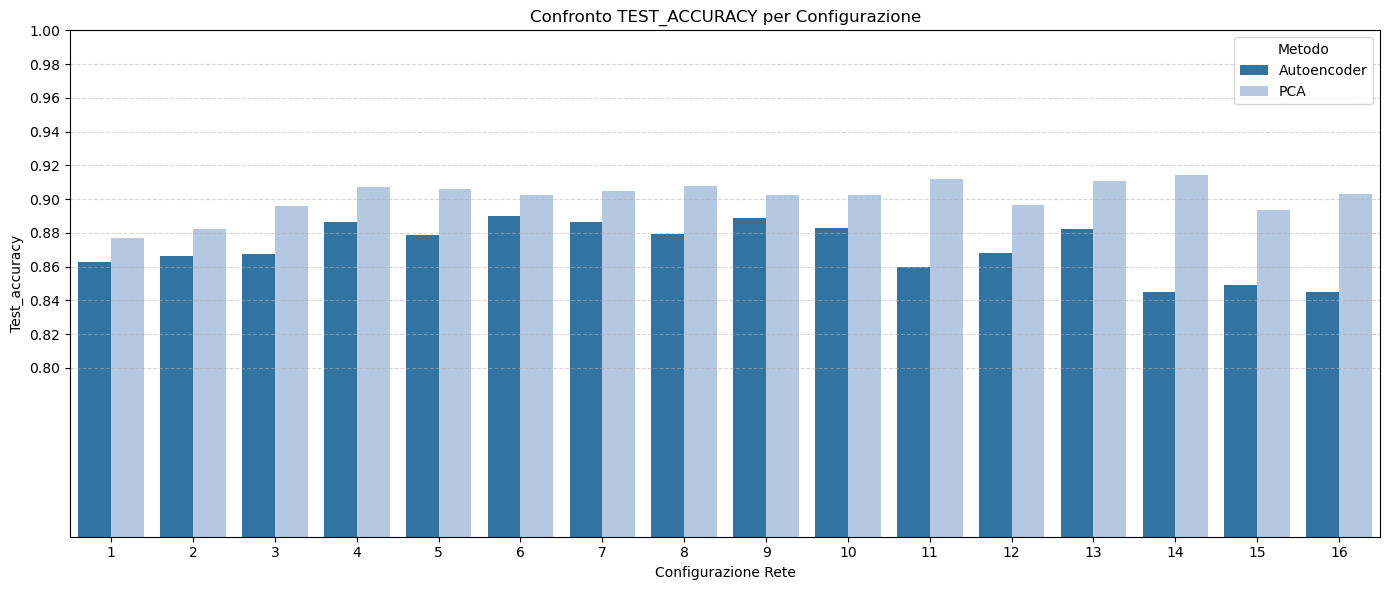

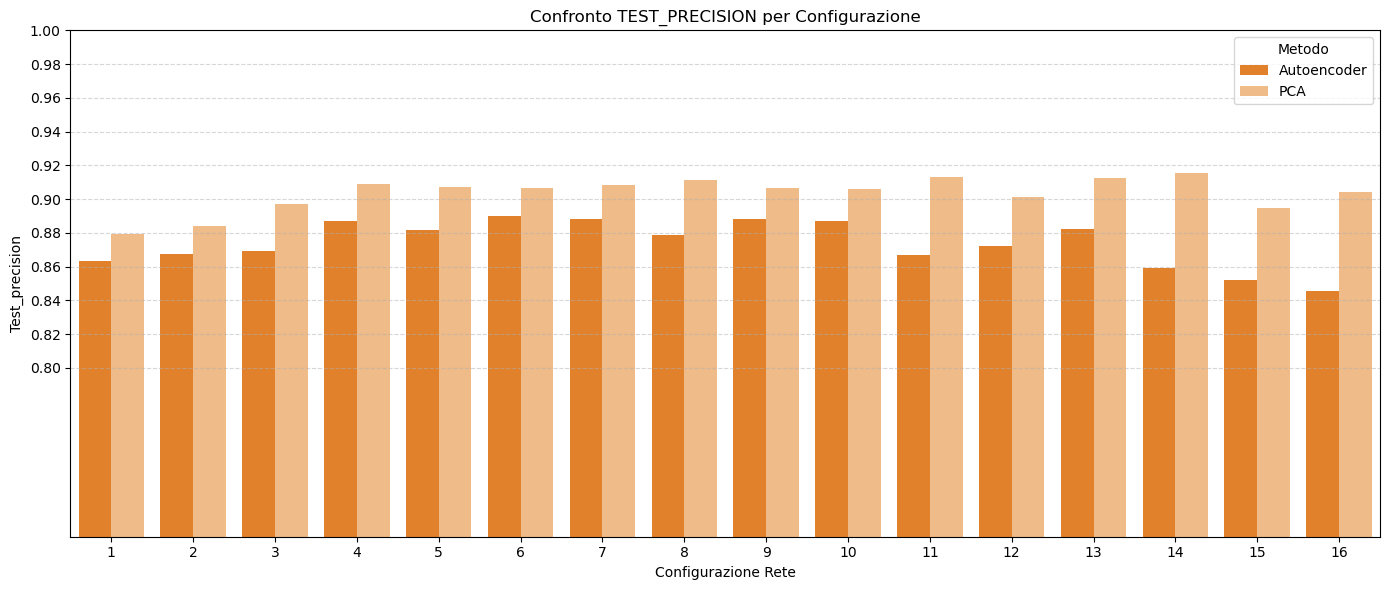

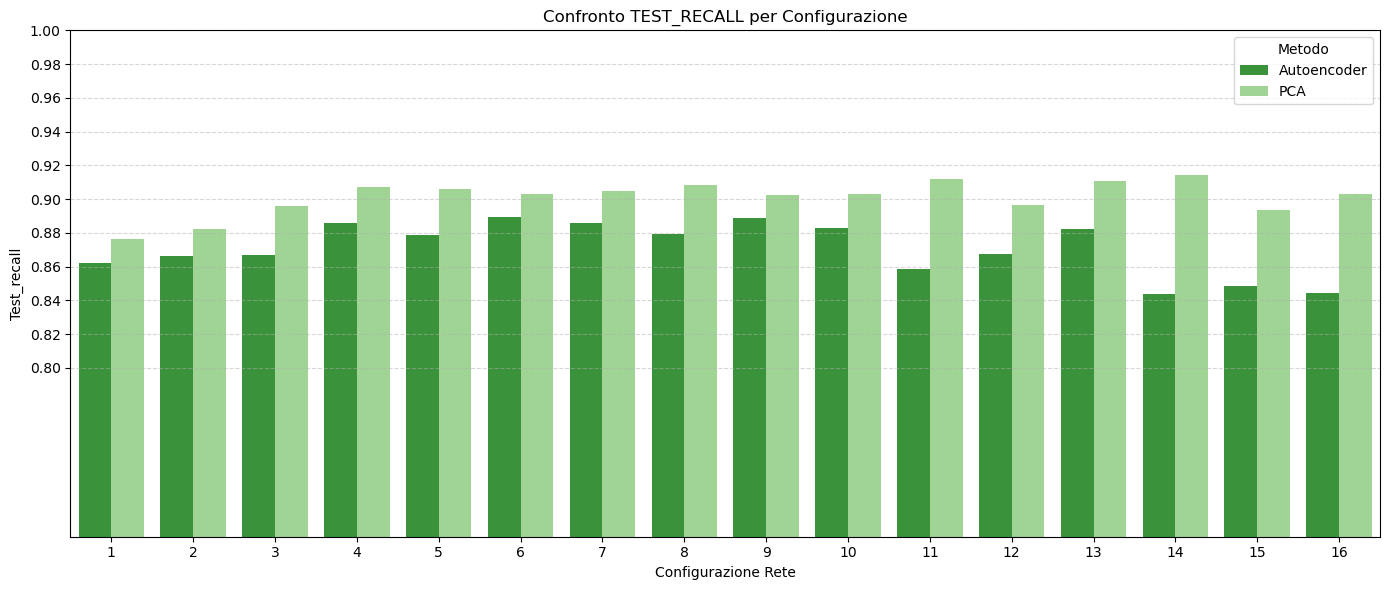

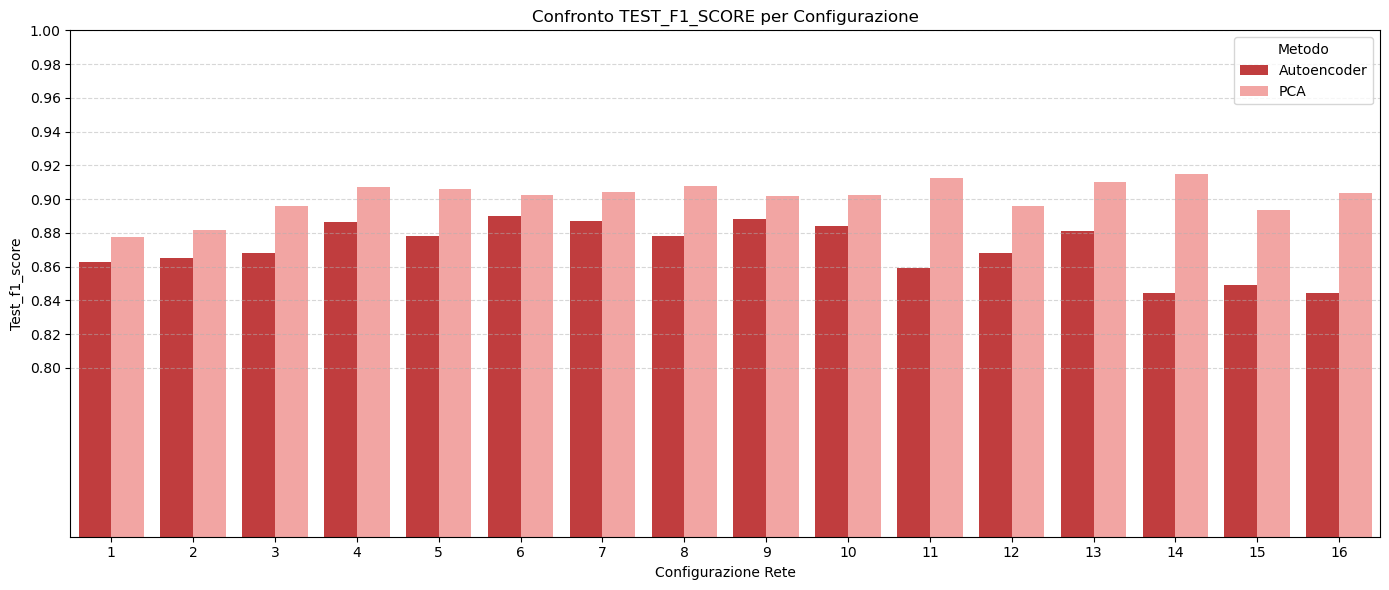

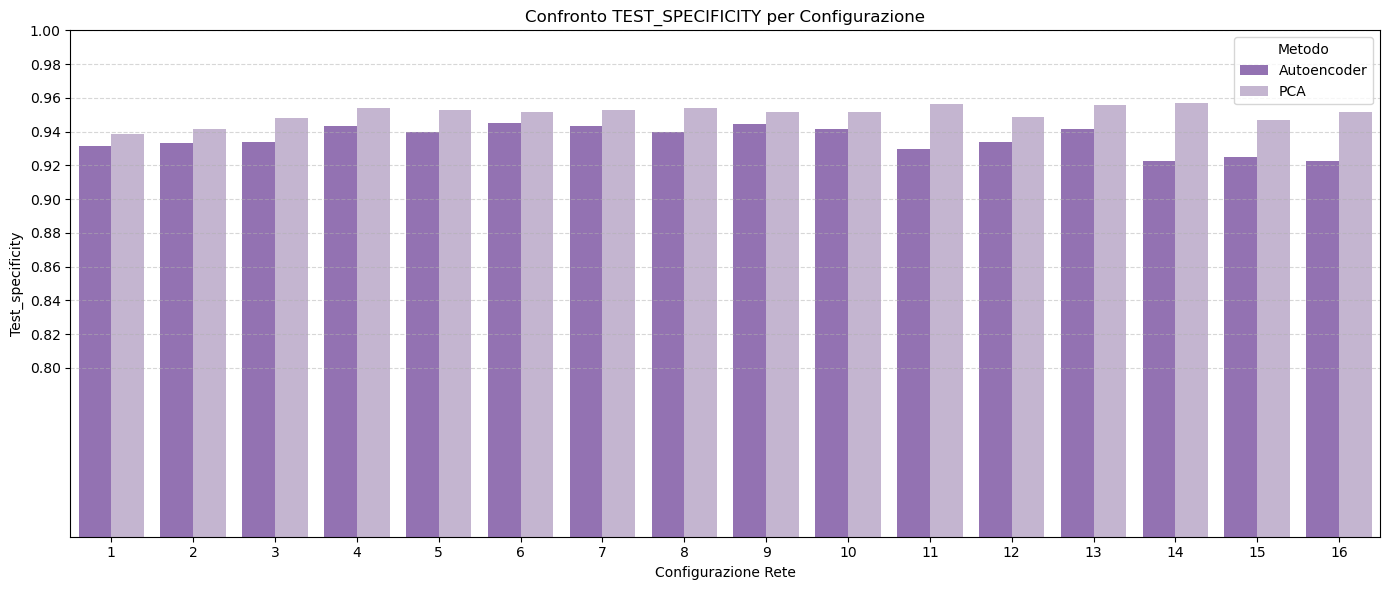

In [38]:
metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1_score', 'test_specificity'] # metriche
metric_colors = {
    'test_accuracy': ['#1f77b4', '#aec7e8'],        # blu
    'test_precision': ['#ff7f0e', '#ffbb78'],       # arancione
    'test_recall': ['#2ca02c', '#98df8a'],          # verde
    'test_f1_score': ['#d62728', '#ff9896'],        # rosso
    'test_specificity': ['#9467bd', '#c5b0d5']      # viola
}

# un plot per ogni metrica
for metric in metrics:
    plt.figure(figsize=(14, 6))
    sns.barplot(data=df, x='config_id', y=metric, hue='method', palette=metric_colors[metric])
    plt.title(f'Confronto {metric.upper()} per Configurazione')
    plt.xlabel("Configurazione Rete")
    plt.ylabel(metric.capitalize())
    plt.ylim(0.7, 1.0)
    plt.yticks(np.arange(0.8, 1.01, 0.02))
    plt.legend(title='Metodo')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(os.path.join(outputs, f'AE_vs_PCA_{metric}.png'))
    plt.show()


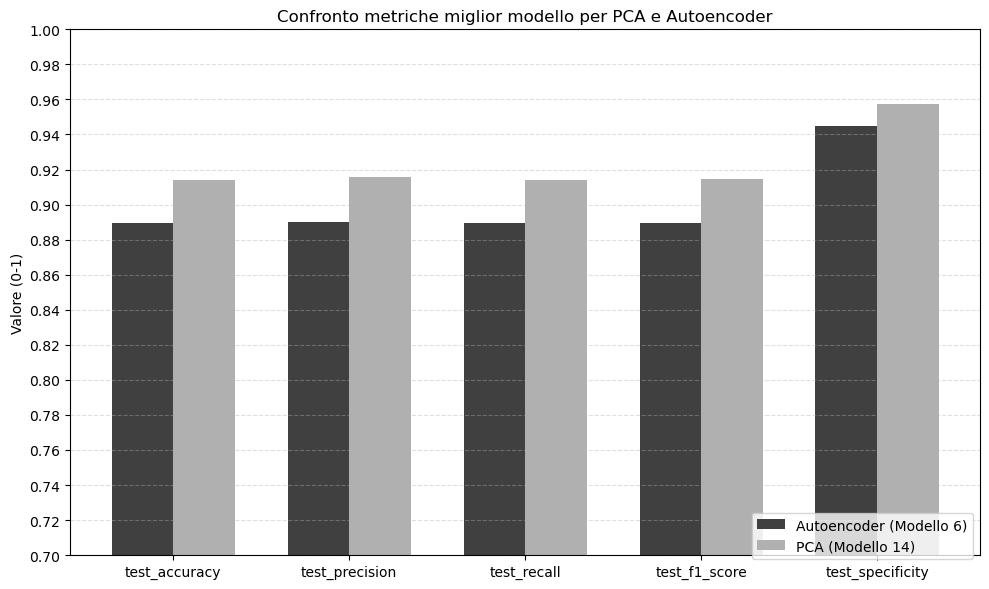

In [39]:
comparison_df = pd.concat([best_ae.to_frame().T, best_pca.to_frame().T])
comparison_df['test_accuracy'] = comparison_df['test_accuracy'] / 100
melted = comparison_df.melt(id_vars=["method"], value_vars=metrics,
                            var_name="metric", value_name="value")

ae_vals = melted[melted['method'] == 'Autoencoder']['value'].values
pca_vals = melted[melted['method'] == 'PCA']['value'].values

x = np.arange(len(metrics))
width = 0.35

pca_color = '#b0b0b0'
ae_color = '#404040'

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, ae_vals, width, label='Autoencoder (Modello 6)', color=ae_color)
plt.bar(x + width/2, pca_vals, width, label='PCA (Modello 14)', color=pca_color)

# Estetica
plt.xticks(x, metrics)
plt.ylim(0.8, 1.0)
plt.yticks(np.arange(0.7, 1.01, 0.02))
plt.ylabel("Valore (0-1)")
plt.title("Confronto metriche miglior modello per PCA e Autoencoder")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title='Metodo')
plt.legend(loc='lower right', bbox_to_anchor=(1, -0.02))
plt.tight_layout()
plt.savefig(os.path.join(outputs, "confronto_metriche_ae_pca.png"))
plt.show()
